In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Загрузка данных

In [2]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

In [3]:
data_train.shape, data_test.shape

((14803, 17), (6344, 18))

In [4]:
data_train.head(10)

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216
5,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51,2018-01-25 23:39,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:19,2018-02-02 07:52,4-Нет,4-Нет влияния,Система62,Место216
6,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:11,2018-02-02 07:52,4-Нет,4-Нет влияния,База,Место216
7,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:15,2018-02-02 07:52,4-Нет,4-Нет влияния,База,Место216
8,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51,2018-01-25 23:39,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:20,2018-02-02 07:52,4-Нет,4-Нет влияния,Система62,Место216
9,"Заявка № ***********, *******************",Сервис21,2-Средний,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 04:41,2018-02-02 07:52,1-Особая,4-Нет влияния,Система21,Место216


In [5]:
data_test.head(10)

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
5,14808,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-24 07:51,2018-02-16 13:15,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 11:02,2018-02-25 12:20,2-Повышенная,4-Нет влияния,Система13,Место25
6,14809,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-24 07:51,2018-02-16 13:15,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-21 15:07,2018-03-08 07:28,2-Повышенная,4-Нет влияния,Система13,Место25
7,14810,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-24 07:51,2018-02-16 13:15,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 06:13,2018-02-25 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
8,14811,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-24 07:51,2018-02-16 13:15,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 06:13,2018-02-25 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
9,14812,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-04-14 06:36,2018-02-16 13:16,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-22 11:03,2018-03-29 12:21,2-Повышенная,4-Нет влияния,Система13,Место25


In [6]:
submission.head()

,id,Тип переклассификации,Тип обращения итоговый
0,14803,NaN,NaN
1,14804,NaN,NaN
2,14805,NaN,NaN
3,14806,NaN,NaN
4,14807,NaN,NaN


In [7]:
data_train.dtypes

Содержание                        object
Сервис                            object
Приоритет                         object
Статус                            object
Функциональная группа             object
Крайний срок                      object
Дата обращения                    object
Тип обращения на момент подачи    object
Тип обращения итоговый            object
Решение                           object
Тип переклассификации              int64
Дата восстановления               object
Дата закрытия обращения           object
Критичность                       object
Влияние                           object
Система                           object
Место                             object
dtype: object

In [8]:
data_train.columns

Index(['Содержание', 'Сервис', 'Приоритет', 'Статус', 'Функциональная группа',
       'Крайний срок', 'Дата обращения', 'Тип обращения на момент подачи',
       'Тип обращения итоговый', 'Решение             ',
       'Тип переклассификации', 'Дата восстановления',
       'Дата закрытия обращения', 'Критичность', 'Влияние', 'Система',
       'Место'],
      dtype='object')

# Exploratory Data Analysis

In [9]:
print("Количество уникальных в трейне: ", data_train['Содержание'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Содержание'].value_counts().shape[0])
content = pd.DataFrame({"Train": data_train['Содержание'].value_counts().head(15), "Test": data_test['Содержание'].value_counts().head(15)})
content

Количество уникальных в трейне:  1465 
Количество уникальных в тесте:  738


,Train,Test
<Бот-наблюдения> Система23. Ухудшение статуса сервиса.,143.0,NaN
Выполнена разблокировка у/з REGION\*****,137.0,NaN
Замена/добавление Сертификат на сервере Система13,241.0,86.0
Запрос на организацию БРМ,152.0,79.0
Заявка на предоставление и отзыв прав доступа к ресурсам,3109.0,1465.0
"Заявка № ***********, *******************",897.0,341.0
Контроль ПУ. Заявка на доступ к портам.,571.0,198.0
Настройка Система8 (для учёта выполненных работ),157.0,NaN
Настройка ЭП в Сервис22,404.0,140.0
Настройка/Консультация /Техническое обслуживание,631.0,289.0


In [10]:
print("Количество уникальных в трейне: ", data_train['Сервис'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Сервис'].value_counts().shape[0])
service = pd.DataFrame({"Train": data_train['Сервис'].value_counts().head(15), "Test": data_test['Сервис'].value_counts().head(15)})
service.transpose()

Количество уникальных в трейне:  153 
Количество уникальных в тесте:  120


,АРМ,Сервис11,Сервис12,Сервис13,Сервис18,Сервис2,Сервис20,Сервис21,Сервис22,Сервис23,Сервис25,Сервис26,Сервис61,Сервис7,Сервис71,Сервис73,Сервис8
Train,3434.0,419.0,241.0,838.0,786.0,808.0,NaN,394.0,1567.0,233.0,NaN,277.0,263.0,1746.0,531.0,399.0,411.0
Test,1073.0,188.0,NaN,311.0,399.0,399.0,291.0,153.0,916.0,NaN,179.0,157.0,192.0,678.0,136.0,131.0,125.0


In [11]:
print("Количество уникальных в трейне: ", data_train['Приоритет'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Приоритет'].value_counts().shape[0])
priority = pd.DataFrame({"Train": data_train['Приоритет'].value_counts(), "Test": data_test['Приоритет'].value_counts()})
priority.transpose()

Количество уникальных в трейне:  4 
Количество уникальных в тесте:  3


,0-Критический,1-Высокий,2-Средний,3-Низкий
Train,3.0,12.0,4694.0,10094.0
Test,NaN,4.0,1805.0,4535.0


In [12]:
print("Количество уникальных в трейне: ", data_train['Статус'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Статус'].value_counts().shape[0])
status = pd.DataFrame({"Train": data_train['Статус'].value_counts(), "Test": data_test['Статус'].value_counts()})
status.transpose()

Количество уникальных в трейне:  2 
Количество уникальных в тесте:  2


,Закрыт,Отменен
Train,14369,434
Test,6189,155


In [13]:
print("Количество уникальных в трейне: ", data_train['Функциональная группа'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Функциональная группа'].value_counts().shape[0])
functional_group = pd.DataFrame({"Train": data_train['Функциональная группа'].value_counts().head(13), "Test": data_test['Функциональная группа'].value_counts().head(13)})
functional_group.transpose()

Количество уникальных в трейне:  555 
Количество уникальных в тесте:  361


,ФГ1,ФГ116,ФГ12,ФГ129,ФГ13,ФГ130,ФГ137,ФГ154,ФГ18,ФГ186,ФГ189,ФГ19,ФГ29,ФГ57,ФГ62,ФГ76,ФГ79,ФГ8
Train,371.0,230.0,1122.0,403.0,3320.0,178.0,407.0,NaN,787.0,NaN,151.0,318.0,NaN,NaN,147.0,NaN,284.0,1103.0
Test,234.0,NaN,400.0,NaN,1714.0,NaN,140.0,76.0,345.0,82.0,NaN,361.0,78.0,83.0,NaN,118.0,122.0,500.0


In [14]:
print("[Крайний срок] Количество уникальных в трейне: ", data_train['Крайний срок'].value_counts().shape[0],
      "\n[Крайний срок] Количество уникальных в тесте: ", data_test['Крайний срок'].value_counts().shape[0])
print("[Дата обращения] Количество уникальных в трейне: ", data_train['Дата обращения'].value_counts().shape[0],
      "\n[Дата обращения] Количество уникальных в тесте: ", data_test['Дата обращения'].value_counts().shape[0])

[Крайний срок] Количество уникальных в трейне:  5666 
[Крайний срок] Количество уникальных в тесте:  2699
[Дата обращения] Количество уникальных в трейне:  7876 
[Дата обращения] Количество уникальных в тесте:  3676


In [15]:
print("Количество уникальных в трейне: ", data_train['Тип обращения на момент подачи'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Тип обращения на момент подачи'].value_counts().shape[0])
type_request_at_time  = pd.DataFrame({"Train": data_train['Тип обращения на момент подачи'].value_counts().head(30), "Test": data_test['Тип обращения на момент подачи'].value_counts().head(30)})
type_request_at_time.transpose()

Количество уникальных в трейне:  2 
Количество уникальных в тесте:  2


,Запрос,Инцидент
Train,14320,483
Test,5914,430


In [16]:
print("Количество уникальных в трейне: ", data_train['Решение             '].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Решение             '].value_counts().shape[0])
solutions = pd.DataFrame({"Train": data_train['Решение             '].value_counts().head(15), "Test": data_test['Решение             '].value_counts().head(15)})
solutions

Количество уникальных в трейне:  1685 
Количество уникальных в тесте:  953


,Train,Test
"Выполнена разблокировка учетной записи Ne_boss\********* и повторный сброс пароля,идентификация пройдена,блокировка вызвана легальным пользователем.Причина-Не определена.Заявител проинформирован.",NaN,79.0
Личность пользователя идентифицирована\nПричина нарушения: Другая\nВыполнена разблокировка учетной записи: ne_Boss\***********,353.0,200.0
Выполнена загрузка разделителей согласно вложению в заявке,NaN,65.0
Выполнена разблокировка у/з Ne_bosS\*********\nИдентификация пользователя осуществлена.\nОбъект доступа легален.\nПричина нарушения: Несколько раз неправильный ввод пароля,146.0,NaN
Выполнено,900.0,297.0
Выполнено.,354.0,74.0
"Добрый день!\nВ текущем релизе Система18 реализована функция создания новой редакции текущего договора/ДС для дальнейшего внесения исправлений.\nВ режиме ""Сведения договора"" - ""Редакции/Версии договора"" для Вашего договора создана новая редакция в статусе Проект, в которую возможно внести все необходимые изменения.\nВход и редактирование осуществляется по нажатию значка ""Карандаш"".\nДалее, необходимо заполнить поле ""Основание внесения исправлений"", указав там причину внесения изменений и затем уже вносить требуемые изменения.\nПереход между пунктами осуществляется аналогично, как и при первичной регистрации договора/ДС, посредством нажатия кнопки ""Далее"".\nПосле заполнения необходимо, также зарегистрировать договор/ДС и осуществить отправку в Сервис22. Реестровый номер не изменится.\n\nПри наличии дополнительных вопросов, просьба перезвонить по тел. **********",148.0,NaN
Доступ предоставлен,236.0,115.0
Доступ предоставлен согласно заявке,123.0,NaN
Запрос отменён пользователем из портала самообслуживания,377.0,137.0


In [17]:
print("\n\nТип переклассификации: ")
print(pd.DataFrame({"Train": data_train['Тип переклассификации'].value_counts()}).transpose())
print("\n\nТип обращения итоговый: ")
print(pd.DataFrame({"Train": data_train['Тип обращения итоговый'].value_counts()}).transpose())



Тип переклассификации: 
           0    2    1
Train  14445  218  140


Тип обращения итоговый: 
       Запрос  Инцидент
Train   14398       405


In [18]:
print("Количество уникальных в трейне: ", data_train['Критичность'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Критичность'].value_counts().shape[0])
criticality  = pd.DataFrame({"Train": data_train['Критичность'].value_counts().head(30), "Test": data_test['Критичность'].value_counts().head(30)})
criticality.transpose()

Количество уникальных в трейне:  4 
Количество уникальных в тесте:  4


,4-Нет,1-Особая,2-Повышенная,3-Базовая
Train,6775,4717,2370,941
Test,2555,1813,1496,480


In [19]:
print("Количество уникальных в трейне: ", data_train['Влияние'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Влияние'].value_counts().shape[0])
influence  = pd.DataFrame({"Train": data_train['Влияние'].value_counts().head(30), "Test": data_test['Влияние'].value_counts().head(30)})
influence.transpose()

Количество уникальных в трейне:  4 
Количество уникальных в тесте:  4


,4-Нет влияния,3-Малое,2-Значительное,1-Всеохватывающее
Train,9123,5615,60,5
Test,4034,2279,29,2


In [20]:
print("Количество уникальных в трейне: ", data_train['Система'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Система'].value_counts().shape[0])
system  = pd.DataFrame({"Train": data_train['Система'].value_counts().head(15), "Test": data_test['Система'].value_counts().head(15)})
system.transpose()

Количество уникальных в трейне:  201 
Количество уникальных в тесте:  151


,База,Система101,Система11,Система13,Система138,Система18,Система2,Система20,Система21,Система22,Система23,Система25,Система26,Система52,Система61,Система7,Система71
Train,3508.0,452.0,429.0,988.0,531.0,784.0,812.0,NaN,395.0,966.0,233.0,200.0,269.0,NaN,263.0,1719.0,399.0
Test,1058.0,171.0,189.0,349.0,NaN,399.0,400.0,133.0,153.0,706.0,NaN,178.0,153.0,189.0,192.0,668.0,131.0


In [21]:
print("Количество уникальных в трейне: ", data_train['Место'].value_counts().shape[0],
      "\nКоличество уникальных в тесте: ", data_test['Место'].value_counts().shape[0])
place  = pd.DataFrame({"Train": data_train['Место'].value_counts().head(15), "Test": data_test['Место'].value_counts().head(15)})
place.transpose()

Количество уникальных в трейне:  314 
Количество уникальных в тесте:  274


,К,Место1,Место10,Место13,Место146,Место15,Место157,Место2,Место25,Место3,Место31,Место32,Место41,Место42,Место5,Место51,Место57,Место8
Train,409.0,744.0,NaN,322.0,227.0,239.0,252.0,251.0,305.0,1039.0,199.0,519.0,249.0,NaN,NaN,244.0,327.0,298.0
Test,250.0,344.0,123.0,137.0,92.0,83.0,NaN,97.0,108.0,438.0,173.0,226.0,NaN,78.0,102.0,82.0,112.0,NaN


# Feature Engineering

In [22]:
import datetime

def extract_time(data, name):
    '''
    Функция для извлечения признаков из времени
    
    Аргументы:
    data -- pandas dataframe с временными рядами
    
    Возвращает:
    pandas dataframe с извлеченными признаками из времени
    '''
    name = name.replace(' ', '_')
    
    # month = data.dt.month.fillna(0)
    # year = data.dt.year.fillna(0)
    # day = data.dt.day.fillna(0)
    weekday = data.dt.weekday.fillna(0)
    hour = data.dt.hour.fillna(0)
    day_of_week = data.dt.day_of_week.fillna(0)
    
    result_df = pd.DataFrame({name + '_weekday': weekday.astype(int).astype('category'),
                              name + '_hour': hour.astype(int).astype('category'),
                              # name + '_month': month.astype(int).astype('category'),
                              # name + '_year': year.astype(int).astype('category'),
                              # name + '_day': day.astype(int).astype('category'),
                              name + '_day_of_week': day_of_week.astype(int).astype('category'),
                              name + '_hour': hour.astype(int).astype('category'),
                              name + '_sin_hour': np.sin(hour.astype(int)),
                              name + '_cos_hour': np.cos(hour.astype(int))})
    
    return result_df, list(result_df.columns)


In [23]:
def prepare_data(data, is_test=False):
    '''
    Функция для подготовки данных к обучению или тестированию
    
    Аргументы:
    data -- pandas dataframe с исходными признаками
    
    Возвращает:
    pandas dataframe с извлеченными признаками для модели
    '''
    # Работа со временем
    date_columns = ['Крайний срок', 'Дата обращения', 'Дата закрытия обращения', 'Дата восстановления']
    date_cols_preprocess = []
    
    time_to_complete = pd.to_datetime(data['Дата закрытия обращения']) - pd.to_datetime(data['Дата обращения'])
    about_the_deadline = pd.to_datetime(data['Дата закрытия обращения']) - pd.to_datetime(data['Крайний срок'])
    data['time_to_complete'] = time_to_complete.dt.seconds
    data['about_the_deadline'] = about_the_deadline.dt.seconds
    data['exiting_the_deadline'] = data['time_to_complete'] - data['about_the_deadline']
    
    for date_col in date_columns:
        prep_date, new_date_names = extract_time(pd.to_datetime(data[date_col]), date_col)
        data[new_date_names] = prep_date
    data = data.drop(columns=date_columns)
    
    return data

In [24]:
%%time
train_df = prepare_data(data_train)
test_df = prepare_data(data_test)
print(train_df.shape, test_df.shape)

(14803, 36) (6344, 37)
CPU times: total: 156 ms
Wall time: 161 ms


In [25]:
float_cols = ['Крайний_срок_sin_hour', 'Крайний_срок_cos_hour', 
              'Дата_обращения_sin_hour', 'Дата_обращения_cos_hour',
              'Дата_закрытия_обращения_sin_hour', 'Дата_закрытия_обращения_cos_hour', 
              'Дата_восстановления_sin_hour', 'Дата_восстановления_cos_hour',
              'time_to_complete', 'about_the_deadline', 'exiting_the_deadline']

date_cols = list(train_df.drop(columns=float_cols).columns)[13:]

# years = [col for col in date_cols if "_year" in col]
# months = [col for col in date_cols if "_month" in col]
days = [col for col in date_cols if "_day" in col]
days_of_week = [col for col in date_cols if "_day_of_week" in col]
hours = [col for col in date_cols if "_hour" in col]
weekdays = [col for col in date_cols if "_weekday" in col]

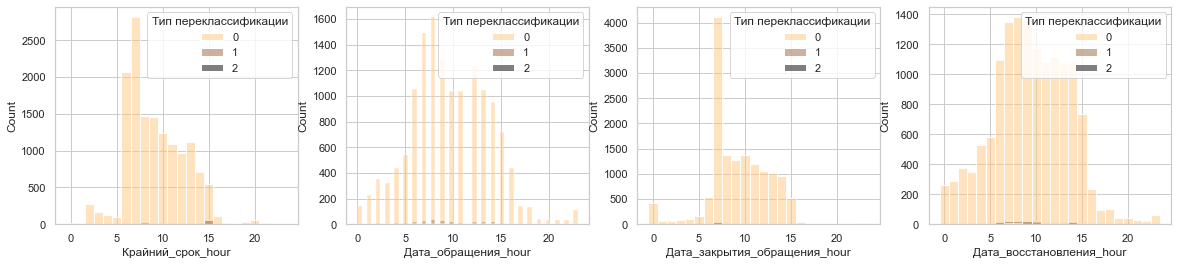

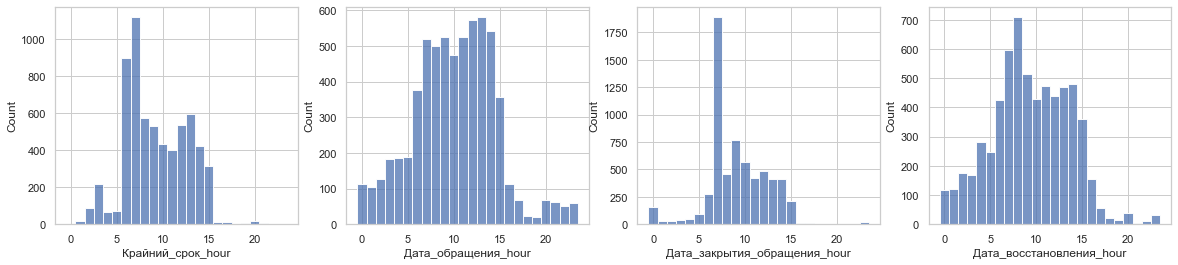

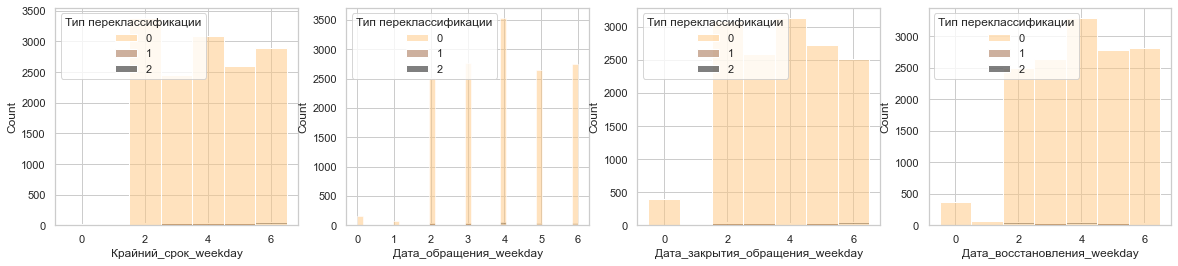

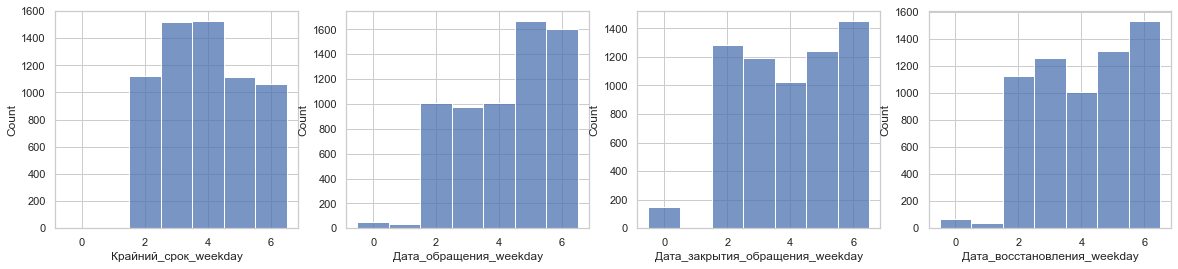

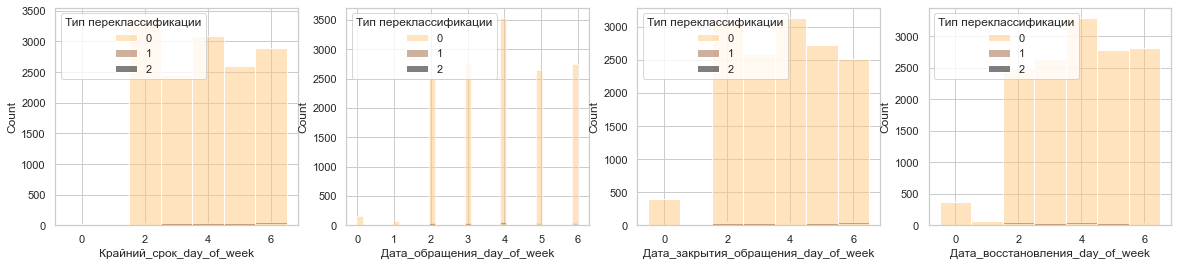

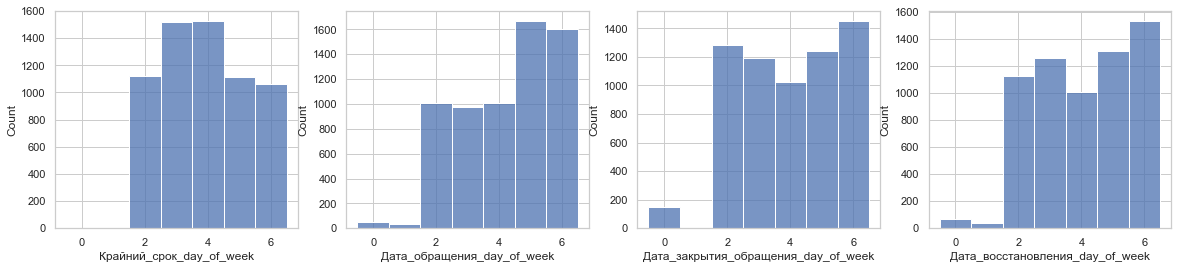

In [26]:
sns.set(rc={'figure.figsize':(20, 4)})
sns.set_style('whitegrid')

groups = [hours, weekdays, days_of_week]
for group_cols in groups:
    fig, ax = plt.subplots(1,4)
    sns.histplot(x=train_df[group_cols].iloc[:, 0], hue=train_df['Тип переклассификации'], ax=ax[0], palette='copper_r');
    sns.histplot(x=train_df[group_cols].iloc[:, 1].astype(int), hue=train_df['Тип переклассификации'], ax=ax[1], palette='copper_r');
    sns.histplot(x=train_df[group_cols].iloc[:, 2], hue=train_df['Тип переклассификации'], ax=ax[2], palette='copper_r');
    sns.histplot(x=train_df[group_cols].iloc[:, 3], hue=train_df['Тип переклассификации'], ax=ax[3], palette='copper_r');
    plt.show()
    
    fig, ax = plt.subplots(1,4)
    sns.histplot(x=test_df[group_cols].iloc[:, 0], ax=ax[0], palette='copper_r');
    sns.histplot(x=test_df[group_cols].iloc[:, 1], ax=ax[1], palette='copper_r');
    sns.histplot(x=test_df[group_cols].iloc[:, 2], ax=ax[2], palette='copper_r');
    sns.histplot(x=test_df[group_cols].iloc[:, 3], ax=ax[3], palette='copper_r');
    plt.show()

# Get SBERT and LaBSE embeddings

In [27]:
train_LaBSE_solution = np.load("train_LaBSE_solution.npy")
train_LaBSE_content = np.load("train_LaBSE_content.npy")
train_SBERT_solution = np.load("train_SBERT_solution.npy")
train_SBERT_content = np.load("train_SBERT_content.npy")
train_LaBSE_solution.shape, train_LaBSE_content.shape, train_SBERT_solution.shape, train_SBERT_content.shape

((14803, 768), (14803, 768), (14803, 1024), (14803, 1024))

In [28]:
LaBSE_solution_columns = ["LaBSE_solution" + str(i) for i in range(train_LaBSE_solution.shape[1])]
LaBSE_content_columns = ["LaBSE_content" + str(i) for i in range(train_LaBSE_content.shape[1])]
SBERT_solution_columns = ["SBERT_solution" + str(i) for i in range(train_SBERT_solution.shape[1])]
SBERT_content_columns = ["SBERT_content" + str(i) for i in range(train_SBERT_content.shape[1])]

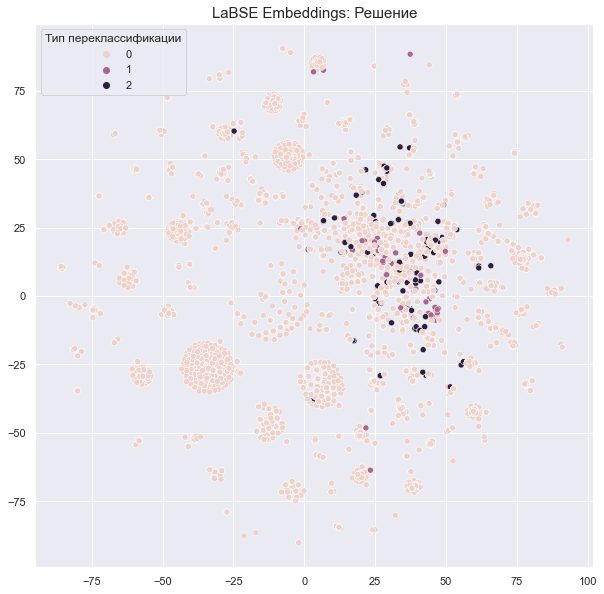

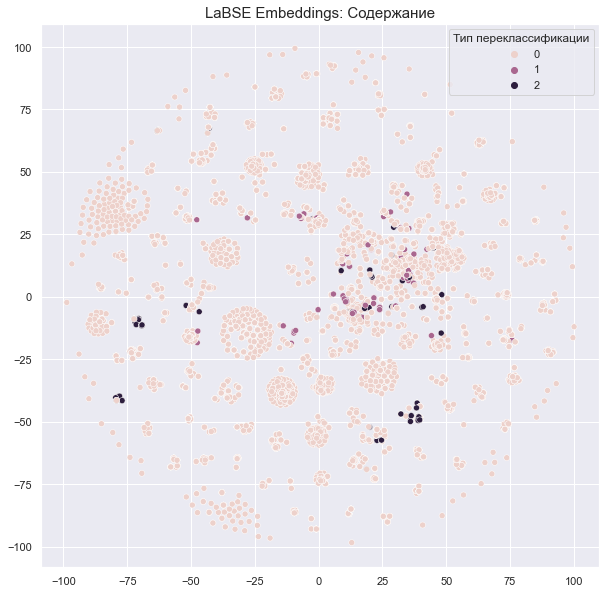

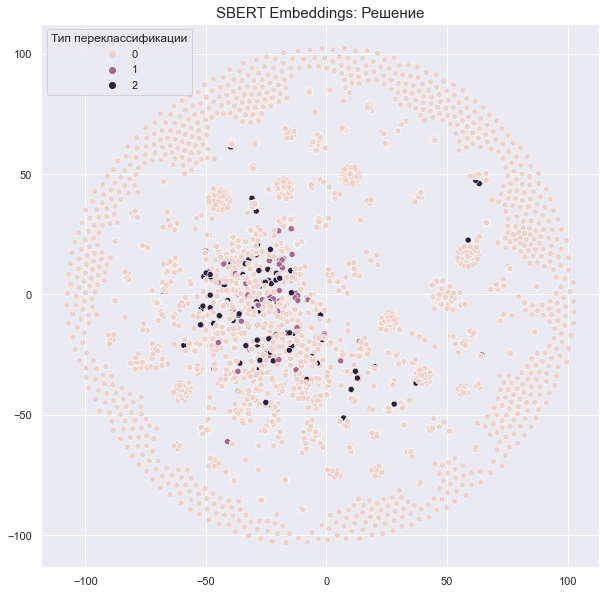

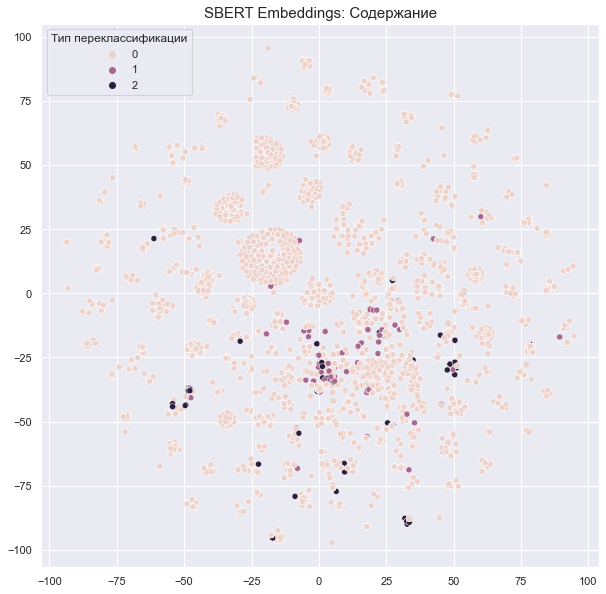

In [29]:
from sklearn.manifold import TSNE

for i, data in enumerate([train_LaBSE_solution, train_LaBSE_content, train_SBERT_solution, train_SBERT_content]):
    model = TSNE(n_components=2)
    transformed = model.fit_transform(X=data, 
                                      y=train_df['Тип переклассификации'])
    X_train_axis, y_train_axis = transformed[:, 0], transformed[:, 1]
    
    type_data = ['Решение', 'Содержание']
    type_model = ['LaBSE', 'LaBSE', 'SBERT', 'SBERT']
    
    sns.set(rc={'figure.figsize':(10, 10)})
    plot = sns.scatterplot(x=X_train_axis, y=y_train_axis, hue=train_df['Тип переклассификации']);
    plot.set_title(type_model[i] + " Embeddings: " + type_data[i % 2], fontsize=15);
    plt.show()

# CatBoost Model

In [30]:
# train_df = train_df.dropna()
train_df['Содержание'] = train_df['Содержание'].fillna("Ничего")

In [31]:
target_columns = ['Тип переклассификации', 'Тип обращения итоговый']
X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop(columns=target_columns + ["Содержание"]), train_df['Тип обращения итоговый'], test_size=0.2, random_state=17)
X_train.shape, X_valid.shape

((11842, 33), (2961, 33))

In [32]:
cat_cols = list(X_train.drop(columns=float_cols).columns)

### Кросс-валидация на 5 фолдах

In [37]:
from sklearn.model_selection import ShuffleSplit
from catboost import Pool, cv
from imblearn.over_sampling import RandomOverSampler

params = {
    'loss_function': 'Logloss',
    'random_seed': 63,
    'iterations': 500,
    'learning_rate': 0.05,
    'task_type': 'CPU',
    'eval_metric': 'F1',
}

X = data_train.drop(columns=target_columns)
y = data_train['Тип обращения итоговый']

shuffle_split = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
cv_data = cv(
    params=params,
    pool=Pool(data=X, label=y, cat_features=cat_cols),
    verbose=False,
    folds=shuffle_split,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1
bestIteration = 19

Training on fold [1/5]

bestTest = 1
bestIteration = 20

Training on fold [2/5]

bestTest = 1
bestIteration = 18

Training on fold [3/5]

bestTest = 1
bestIteration = 20

Training on fold [4/5]

bestTest = 1
bestIteration = 19



In [87]:
# embeddings_list = embeddings.to_numpy().tolist()
# train_df['embeddings_list'] = embeddings_list

In [88]:
# train_df = pd.concat([train_df, train_LaBSE_solution], axis=1)
# embed_cols = list(train_LaBSE_solution.columns)

In [33]:
train_df[LaBSE_solution_columns] = train_LaBSE_solution
train_df[LaBSE_content_columns] = train_LaBSE_content
train_df[SBERT_solution_columns] = train_SBERT_solution
train_df[SBERT_content_columns] = train_SBERT_content

In [34]:
target_columns = ['Тип переклассификации', 'Тип обращения итоговый']
X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop(columns=target_columns + ["Содержание"]), train_df['Тип переклассификации'], test_size=0.2, random_state=17)
X_train.shape, X_valid.shape

((11842, 3617), (2961, 3617))

In [35]:
for cat_col in cat_cols:
    train_df[cat_col] = train_df[cat_col].astype("category")

In [36]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [37]:
X_resampled.shape

(34659, 3617)

In [38]:
from catboost import Pool, cv, CatBoostClassifier

model = CatBoostClassifier(
    random_seed=63,
    loss_function='MultiClass',
    iterations=170,
    learning_rate=0.05,
    task_type='CPU',
    eval_metric='TotalF1',
)

model.fit(
    # Pool(data=X_resampled, label=y_resampled, cat_features=cat_cols, embedding_features=['embeddings_list']),
    Pool(data=X_resampled, label=y_resampled, cat_features=cat_cols),
    verbose=50,
    # eval_set=Pool(data=X_valid, label=y_valid, cat_features=cat_cols, embedding_features=['embeddings_list']),
    eval_set=Pool(data=X_valid, label=y_valid, cat_features=cat_cols),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9518629	test: 0.9652872	best: 0.9652872 (0)	total: 1.89s	remaining: 5m 19s
50:	learn: 0.9956675	test: 0.9854356	best: 0.9854356 (50)	total: 1m 22s	remaining: 3m 11s
100:	learn: 0.9987881	test: 0.9894516	best: 0.9903078 (90)	total: 2m 38s	remaining: 1m 48s
150:	learn: 0.9989902	test: 0.9895405	best: 0.9903078 (90)	total: 3m 49s	remaining: 28.9s
169:	learn: 0.9991344	test: 0.9898428	best: 0.9903078 (90)	total: 4m 15s	remaining: 0us

bestTest = 0.9903078293
bestIteration = 90

Shrink model to first 91 iterations.


In [39]:
# fi = model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_cols, embedding_features=['embeddings_list']), prettified=True)
fi = model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_cols), prettified=True)
fi.head(25)

,Feature Id,Importances
0,Тип обращения на момент подачи,21.274487
1,Функциональная группа,11.001740
2,Решение,6.212510
3,SBERT_solution332,4.135654
4,SBERT_solution188,3.959969
5,SBERT_solution308,3.679168
6,Приоритет,3.557265
7,SBERT_solution331,3.289581
8,SBERT_solution386,2.896766
9,LaBSE_content397,2.154765


In [40]:
from sklearn.metrics import classification_report

# predictions = model.predict(Pool(X_valid, y_valid, cat_features=cat_cols, embedding_features=['embeddings_list']))
predictions = model.predict(Pool(X_valid, y_valid, cat_features=cat_cols))
predictions = np.array(predictions).reshape(1, -1)[0]

In [41]:
pd.DataFrame({"Predictions": pd.Series(predictions).value_counts(), 
              "Real": y_valid.value_counts()})

,Predictions,Real
0,2898,2892
1,23,36
2,40,33


In [42]:
print(classification_report(y_valid.to_numpy(), predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2892
           1       1.00      0.64      0.78        36
           2       0.72      0.88      0.79        33

    accuracy                           0.99      2961
   macro avg       0.91      0.84      0.86      2961
weighted avg       0.99      0.99      0.99      2961



In [43]:
important_features = list(fi['Feature Id'].to_numpy()[:1000])

In [44]:
from catboost import Pool, cv, CatBoostClassifier

model = CatBoostClassifier(
    random_seed=63,
    loss_function='MultiClass',
    iterations=170,
    learning_rate=0.05,
    task_type='CPU',
    eval_metric='TotalF1',
)

model.fit(
    # Pool(data=X_resampled, label=y_resampled, cat_features=cat_cols, embedding_features=['embeddings_list']),
    Pool(data=X_resampled[important_features], label=y_resampled, cat_features=cat_cols),
    verbose=50,
    # eval_set=Pool(data=X_valid, label=y_valid, cat_features=cat_cols, embedding_features=['embeddings_list']),
    eval_set=Pool(data=X_valid[important_features], label=y_valid, cat_features=cat_cols),
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9538862	test: 0.9407824	best: 0.9407824 (0)	total: 485ms	remaining: 1m 21s
50:	learn: 0.9952908	test: 0.9842902	best: 0.9842902 (50)	total: 24.2s	remaining: 56.5s
100:	learn: 0.9984419	test: 0.9888999	best: 0.9896819 (81)	total: 48.1s	remaining: 32.8s
150:	learn: 0.9991344	test: 0.9900399	best: 0.9900670 (118)	total: 1m 10s	remaining: 8.92s
169:	learn: 0.9991633	test: 0.9903393	best: 0.9903393 (166)	total: 1m 19s	remaining: 0us

bestTest = 0.9903393443
bestIteration = 166

Shrink model to first 167 iterations.


In [45]:
from sklearn.metrics import classification_report

# predictions = model.predict(Pool(X_valid, y_valid, cat_features=cat_cols, embedding_features=['embeddings_list']))
predictions = model.predict(Pool(X_valid[important_features], y_valid, cat_features=cat_cols))
predictions = np.array(predictions).reshape(1, -1)[0]

In [46]:
pd.DataFrame({"Predictions": pd.Series(predictions).value_counts(), 
              "Real": y_valid.value_counts()})

,Predictions,Real
0,2903,2892
1,21,36
2,37,33


In [47]:
print(classification_report(y_valid.to_numpy(), predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2892
           1       1.00      0.58      0.74        36
           2       0.78      0.88      0.83        33

    accuracy                           0.99      2961
   macro avg       0.93      0.82      0.85      2961
weighted avg       0.99      0.99      0.99      2961



In [ ]:
from catboost import EShapCalcType, EFeaturesSelectionAlgorithm
from catboost import cv, Pool

params = {
    'loss_function': 'MultiClass',
    'random_seed': 63,
    'iterations': 150,
    'learning_rate': 0.05,
    'task_type': 'CPU',
    'eval_metric': 'TotalF1',
}

def select_features(algorithm: EFeaturesSelectionAlgorithm, steps: int = 1):
    print('Algorithm:', algorithm)
    clf = CatBoostClassifier(**params)
    # train_pool = Pool(X_train, y_train, cat_features=cat_cols, embedding_features=['embeddings_list'])
    # test_pool = Pool(X_valid, y_valid, cat_features=cat_cols, embedding_features=['embeddings_list'])
    train_pool = Pool(X_train, y_train, cat_features=cat_cols)
    test_pool = Pool(X_valid, y_valid, cat_features=cat_cols)
    summary = clf.select_features(
        train_pool,
        eval_set=test_pool,
        features_for_select=list(range(train_pool.num_col())),
        num_features_to_select=20,
        steps=steps,
        algorithm=algorithm,
        shap_calc_type=EShapCalcType.Regular,
        train_final_model=True,
        logging_level='Silent',
        plot=True
    )
    print('Selected features:', summary['selected_features_names'])
    return summary

# %%time
shap_summary = select_features(algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues, steps=1)

Algorithm: EFeaturesSelectionAlgorithm.RecursiveByShapValues


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))